"heart.csv" is a dataset which contains data about heart disease patients. In this project the aim is to predict whether randomly-selected people have heart disease. We'll start by doing some EDA and then we'll train three models and determine their accuracy.  

# EDA

In [5]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [7]:
df = pd.read_csv("heart.csv")
df.head()

age  sex  chest_pain_type  resting_bp  cholestoral  fasting_blood_sugar  \
0   63    1                3         145          233                    1   
1   37    1                2         130          250                    0   
2   41    0                1         130          204                    0   
3   56    1                1         120          236                    0   
4   57    0                0         120          354                    0   

   restecg  max_hr  exang  oldpeak  slope  num_major_vessels  thal  target  
0        0     150      0      2.3      0                  0     1       1  
1        1     187      0      3.5      0                  0     2       1  
2        0     172      0      1.4      2                  0     2       1  
3        1     178      0      0.8      2                  0     2       1  
4        1     163      1      0.6      2                  0     2       1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


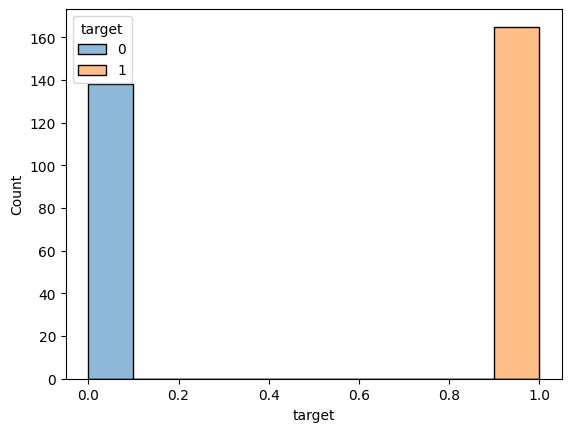

target
1    165
0    138
Name: count, dtype: int64

In [9]:
sns.histplot(data= df, x ='target', hue='target')
plt.show()
df['target'].value_counts()

<Axes: >

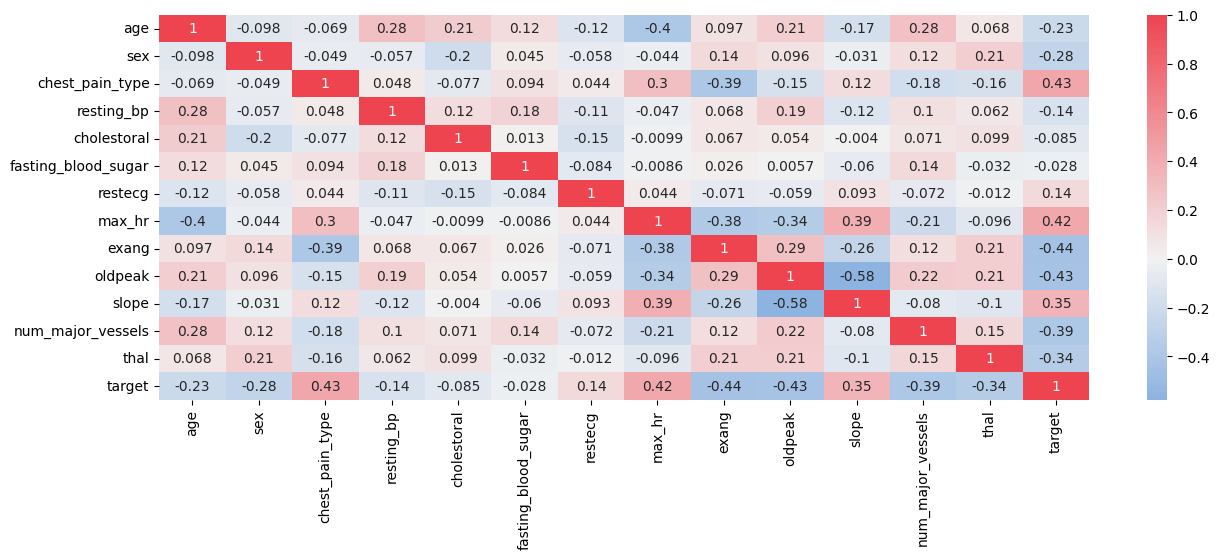

In [10]:
corrmat= df.corr()
plt.figure(figsize=(15,5))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [11]:
df['sex'].value_counts(normalize=True)

sex
1    0.683168
0    0.316832
Name: proportion, dtype: float64

In [12]:
df.describe()

age         sex  chest_pain_type  resting_bp  cholestoral  \
count  303.000000  303.000000       303.000000  303.000000   303.000000   
mean    54.366337    0.683168         0.966997  131.623762   246.264026   
std      9.082101    0.466011         1.032052   17.538143    51.830751   
min     29.000000    0.000000         0.000000   94.000000   126.000000   
25%     47.500000    0.000000         0.000000  120.000000   211.000000   
50%     55.000000    1.000000         1.000000  130.000000   240.000000   
75%     61.000000    1.000000         2.000000  140.000000   274.500000   
max     77.000000    1.000000         3.000000  200.000000   564.000000   

       fasting_blood_sugar     restecg      max_hr       exang     oldpeak  \
count           303.000000  303.000000  303.000000  303.000000  303.000000   
mean              0.148515    0.528053  149.646865    0.326733    1.039604   
std               0.356198    0.525860   22.905161    0.469794    1.161075   
min               0.000000    0.000000   71.000000    0.000000    0.000000   
25%               0.000000    0.000000  133.500000    0.000000    0.000000   
50%               0.000000    1.000000  153.000000    0.000000    0.800000   
75%               0.000000    1.000000  166.000000    1.000000    1.600000   
max               1.000000    2.000000  202.000000    1.000000    6.200000   

            slope  num_major_vessels        thal      target  
count  303.000000         303.000000  303.000000  303.000000  
mean     1.399340           0.729373    2.313531    0.544554  
std      0.616226           1.022606    0.612277    0.498835  
min      0.000000           0.000000    0.000000    0.000000  
25%      1.000000           0.000000    2.000000    0.000000  
50%      1.000000           0.000000    2.000000    1.000000  
75%      2.000000           1.000000    3.000000    1.000000  
max      2.000000           4.000000    3.000000    1.000000

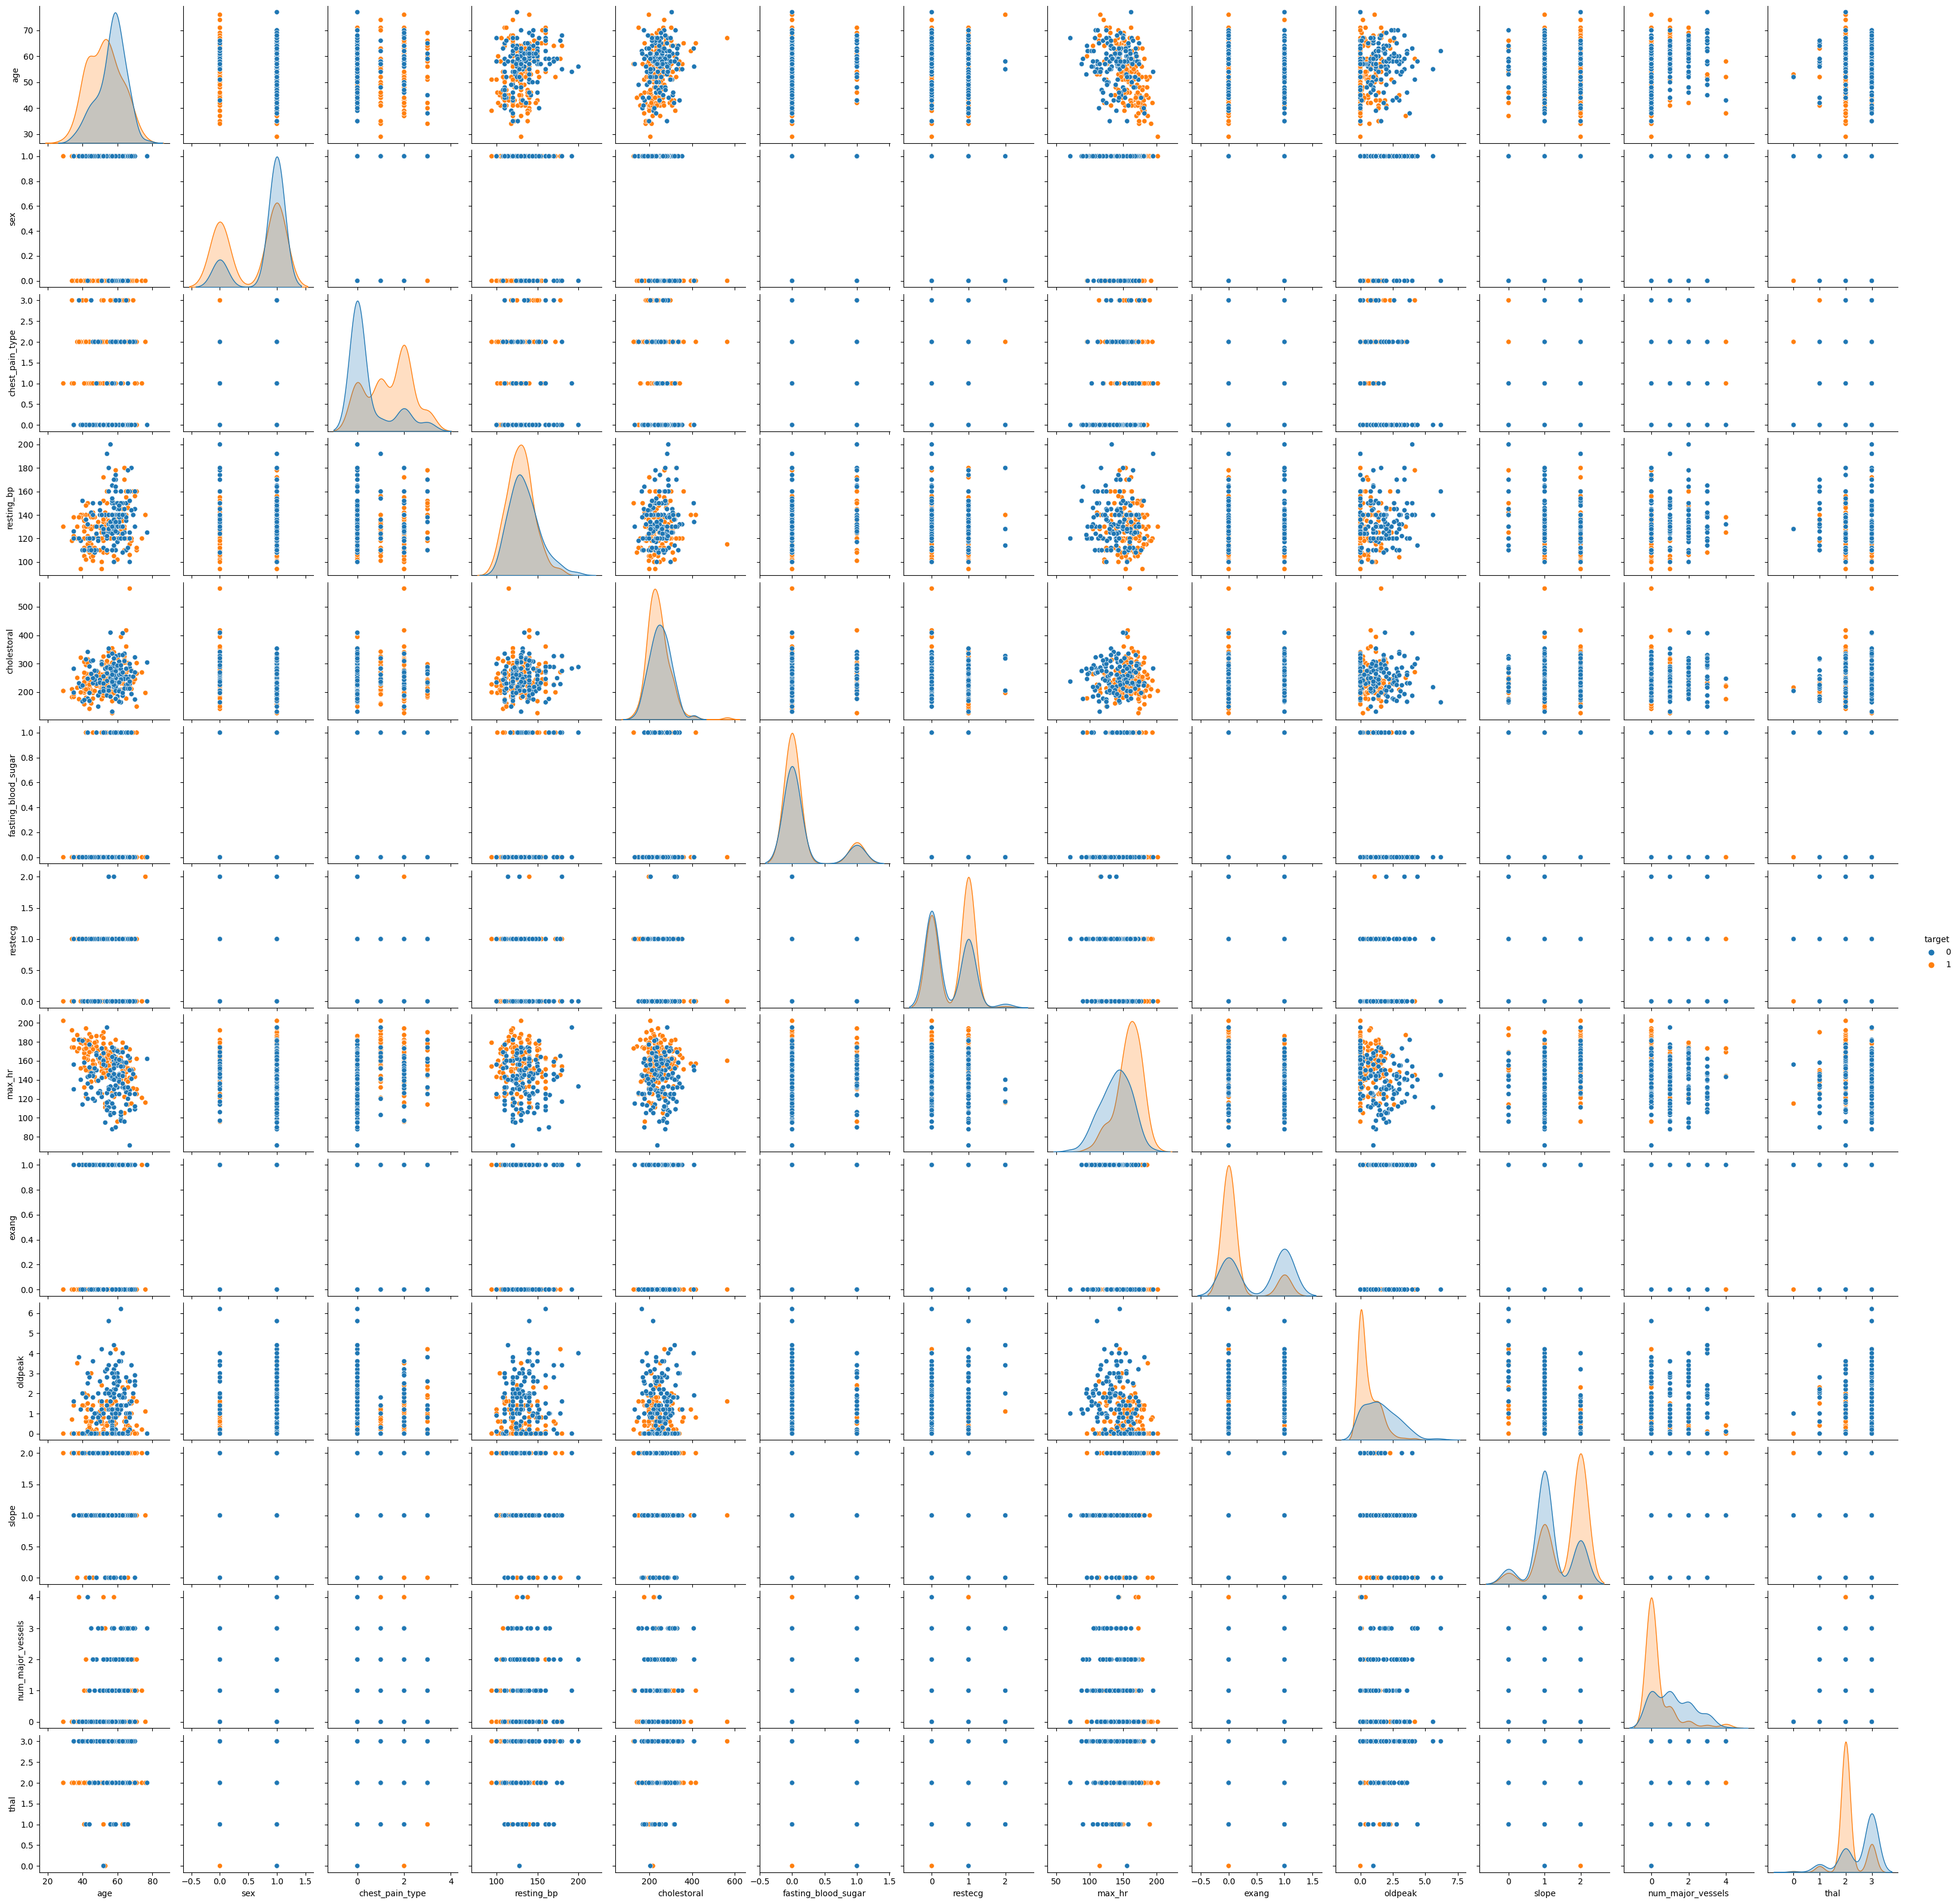

In [13]:
sns.pairplot(df, hue='target')
plt.show()

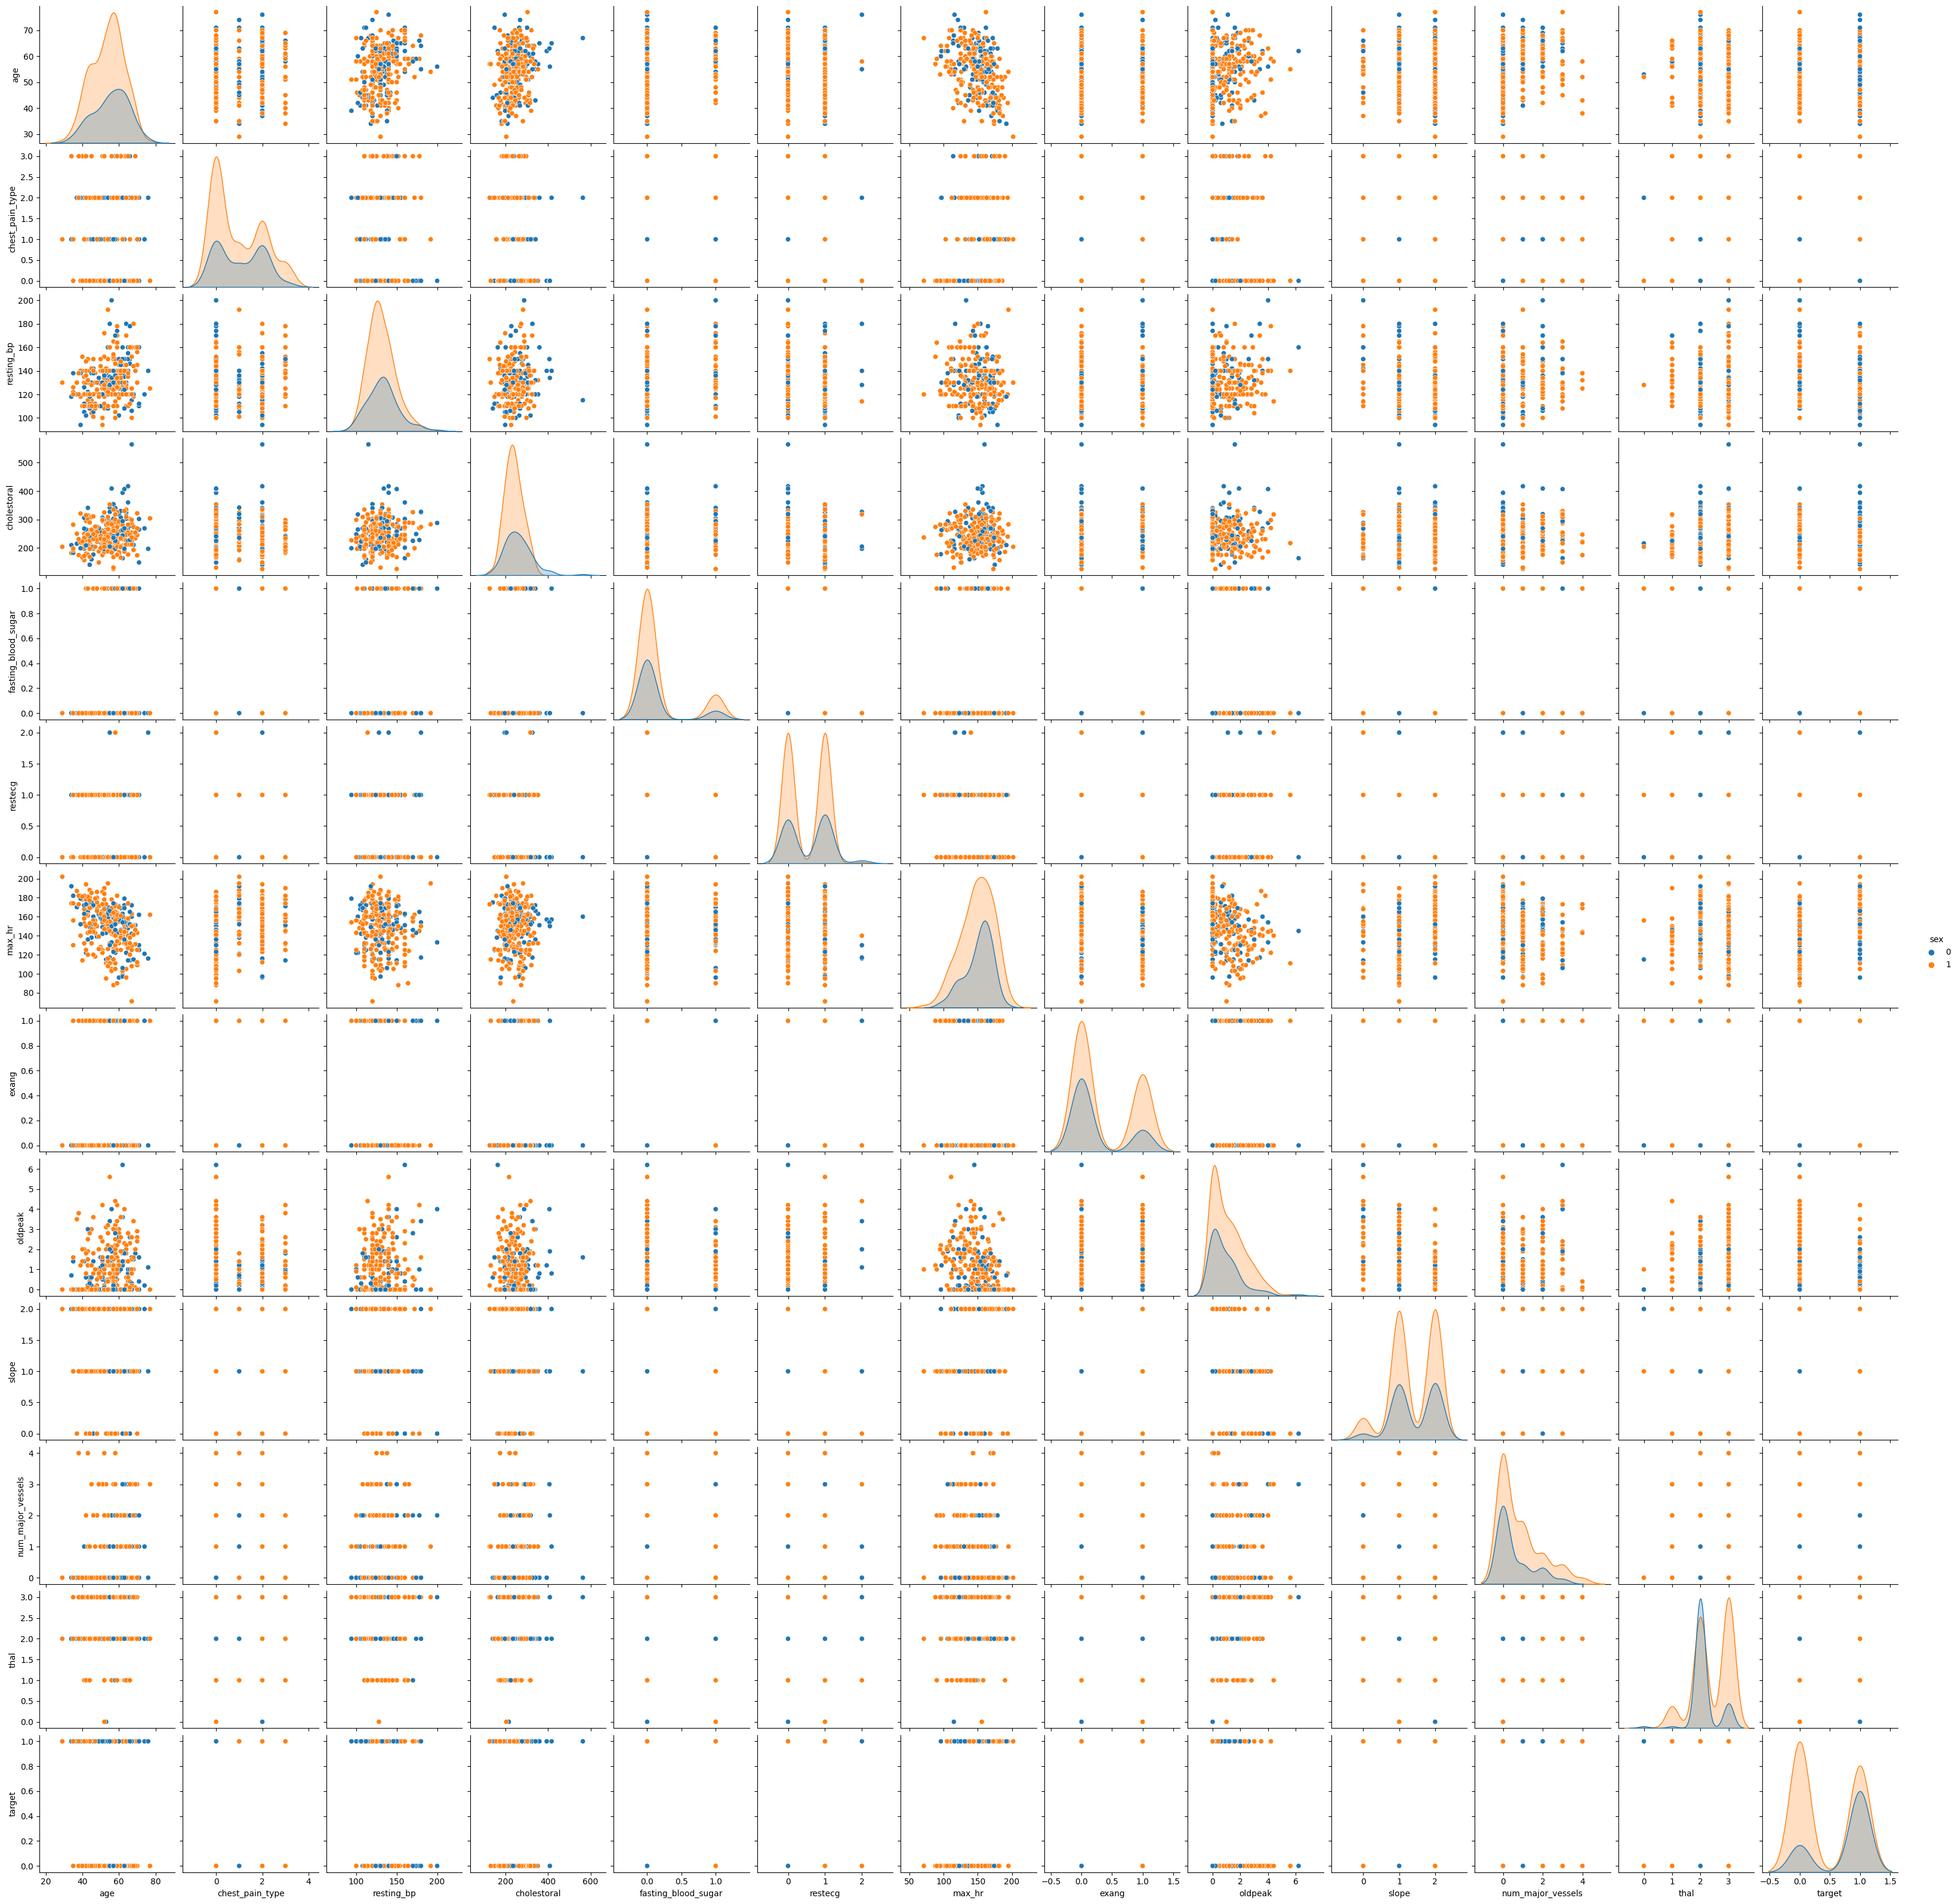

In [14]:
sns.pairplot(df, hue='sex')
plt.show()

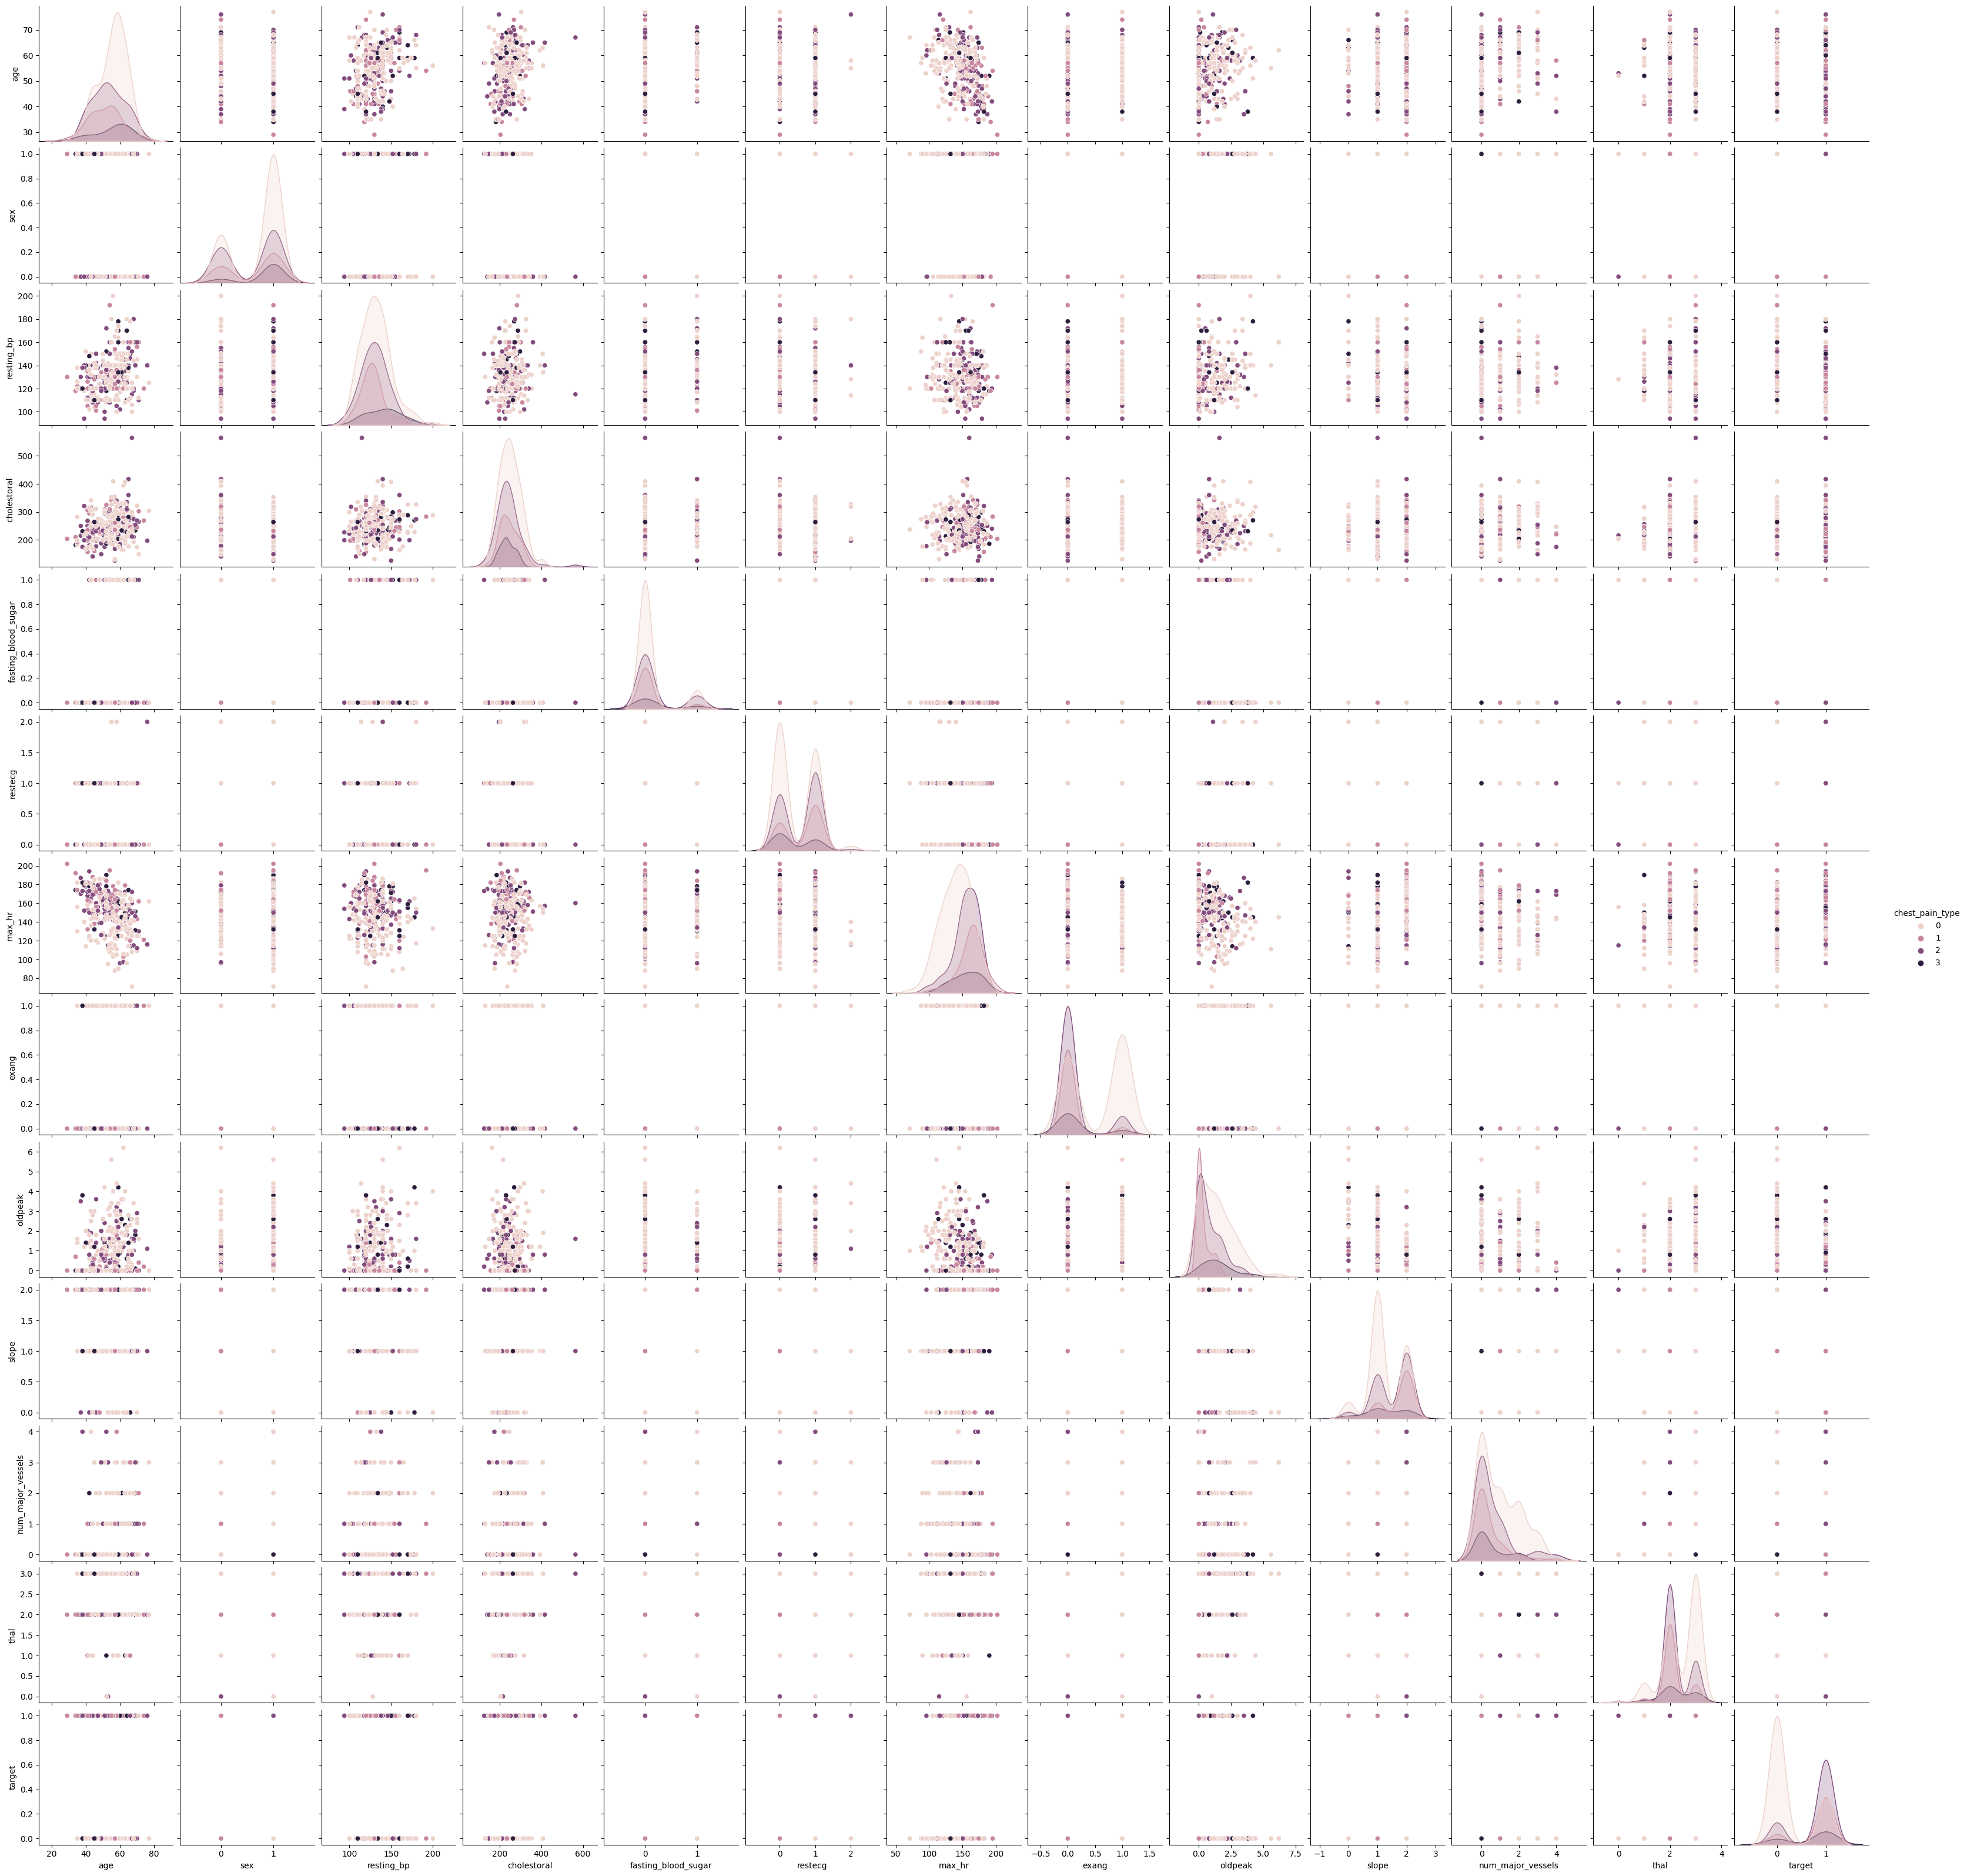

In [15]:
sns.pairplot(df, hue='chest_pain_type')
plt.show()

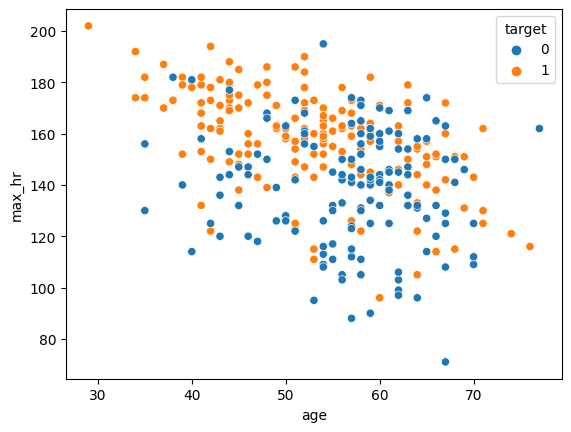

In [16]:
sns.scatterplot(data=df, x='age', y='max_hr', hue='target')
plt.show()

In [17]:
x = df.drop('target', axis=1)
y = df['target']

### The features need to be scaled

In [18]:
#Setting up standard scaling for the features
col_names = list(x.columns)
s_scaler = preprocessing.StandardScaler()
x_df = s_scaler.fit_transform(x)
x_df = pd.DataFrame(x_df, columns = col_names)   
x_df.describe().T

count          mean       std       min       25%  \
age                  303.0  4.690051e-17  1.001654 -2.797624 -0.757280   
sex                  303.0 -1.407015e-16  1.001654 -1.468418 -1.468418   
chest_pain_type      303.0  2.345026e-17  1.001654 -0.938515 -0.938515   
resting_bp           303.0 -7.035077e-16  1.001654 -2.148802 -0.663867   
cholestoral          303.0 -1.113887e-16  1.001654 -2.324160 -0.681494   
fasting_blood_sugar  303.0 -2.345026e-17  1.001654 -0.417635 -0.417635   
restecg              303.0  1.465641e-16  1.001654 -1.005832 -1.005832   
max_hr               303.0 -6.800574e-16  1.001654 -3.439267 -0.706111   
exang                303.0 -4.690051e-17  1.001654 -0.696631 -0.696631   
oldpeak              303.0  2.345026e-17  1.001654 -0.896862 -0.896862   
slope                303.0 -1.407015e-16  1.001654 -2.274579 -0.649113   
num_major_vessels    303.0 -2.345026e-17  1.001654 -0.714429 -0.714429   
thal                 303.0 -1.641518e-16  1.001654 -3.784824 -0.512922   

                          50%       75%       max  
age                  0.069886  0.731619  2.496240  
sex                  0.681005  0.681005  0.681005  
chest_pain_type      0.032031  1.002577  1.973123  
resting_bp          -0.092738  0.478391  3.905165  
cholestoral         -0.121055  0.545674  6.140401  
fasting_blood_sugar -0.417635 -0.417635  2.394438  
restecg              0.898962  0.898962  2.803756  
max_hr               0.146634  0.715131  2.289429  
exang               -0.696631  1.435481  1.435481  
oldpeak             -0.206705  0.483451  4.451851  
slope               -0.649113  0.976352  0.976352  
num_major_vessels   -0.714429  0.265082  3.203615  
thal                -0.512922  1.123029  1.123029

### Looking at the scaled features

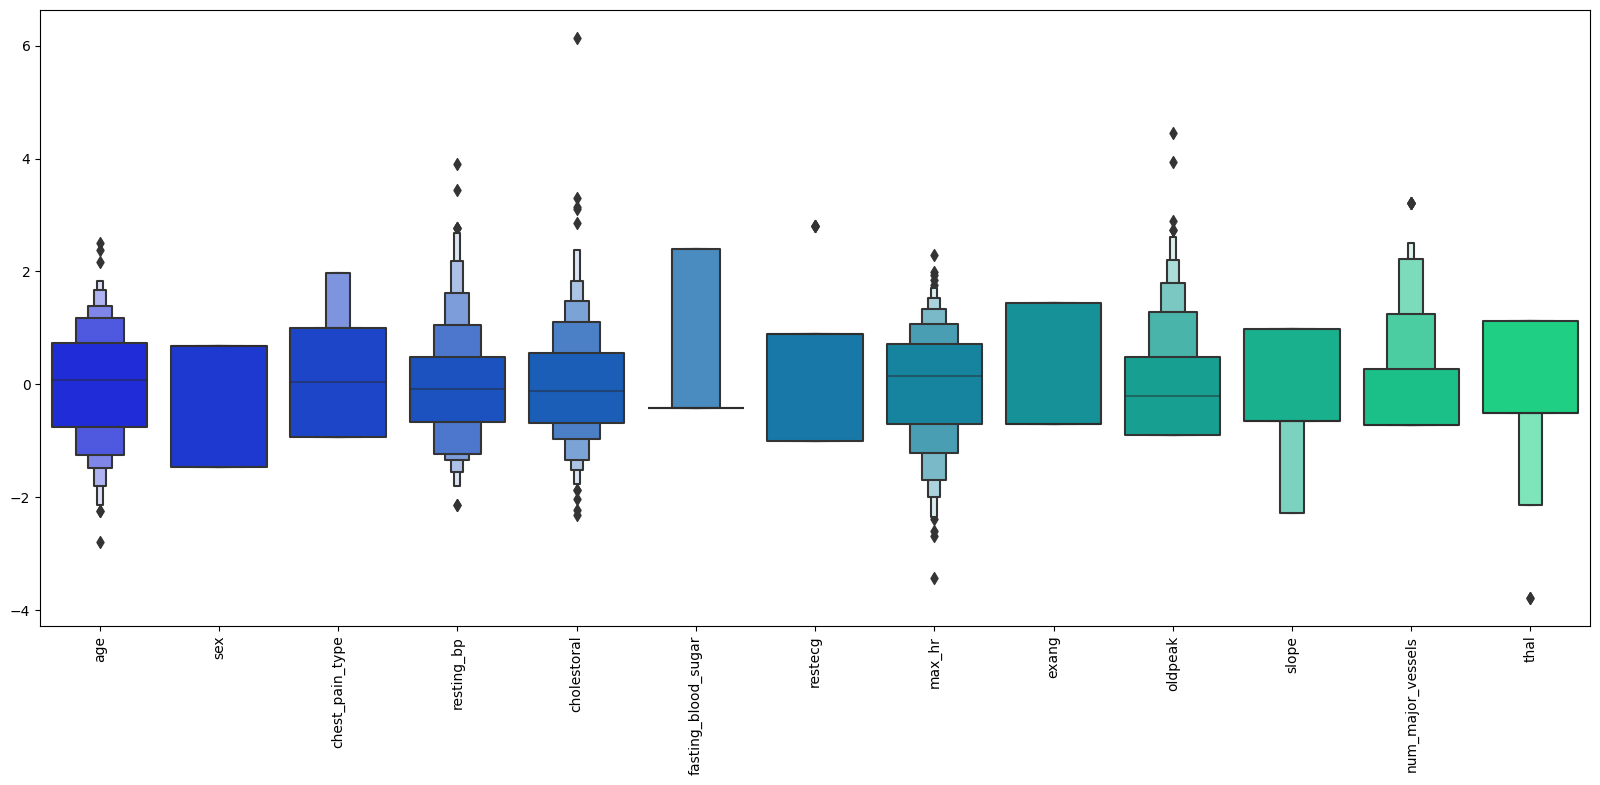

In [19]:
plt.figure(figsize=(20,8))
sns.boxenplot(data = x_df,palette = 'winter')
plt.xticks(rotation=90)
plt.show()

# Model Selection 

## 1-KNN

#### Finding the Best K value in the range [1,20]

In [20]:
k_vals = list(range(1, 21))
cvs_vals = []
for i, k in enumerate(k_vals):
    
    model = KNeighborsClassifier(n_neighbors=k)

    cvs = cross_val_score(model, x, y, cv=3)
    cvs_vals.append(cvs.mean().round(4))

In [21]:
k_vals

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [22]:
K_neighbours = pd.DataFrame({'n_neighbours': k_vals, 'score':cvs_vals})
K_neighbours

n_neighbours   score
0              1  0.5974
1              2  0.5842
2              3  0.6073
3              4  0.6040
4              5  0.6304
5              6  0.6337
6              7  0.6337
7              8  0.6106
8              9  0.6304
9             10  0.6436
10            11  0.6568
11            12  0.6502
12            13  0.6799
13            14  0.6601
14            15  0.6634
15            16  0.6568
16            17  0.6502
17            18  0.6337
18            19  0.6535
19            20  0.6337

In [23]:
K_neighbours['score'].values.max()

0.6799

### Highest-scoring K value is 13

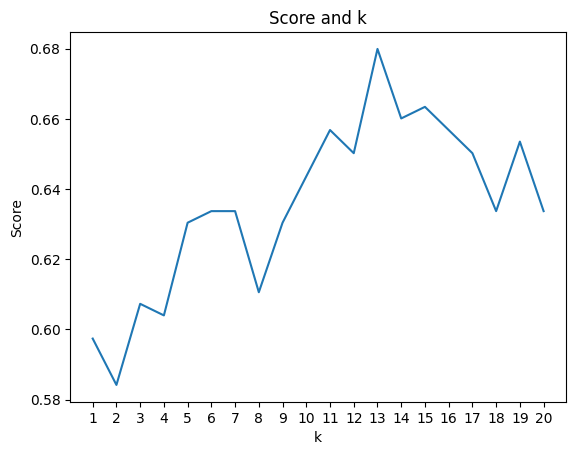

In [24]:
plt.title('Score and k')
sns.lineplot(x=k_vals, y=cvs_vals)

plt.xlabel('k')
plt.ylabel('Score')
plt.xticks(k_vals)
plt.show()

In [49]:
K_num = 13
KNN = KNeighborsClassifier(n_neighbors=K_num)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=13)

#### Scoring the KNN model we came up with

In [26]:
score = KNN.score(x_test, y_test)
y_pred = KNN.predict(x_test)

print('Score: {:.4f}'.format(score))
print(classification_report(y_test, y_pred))



Score: 0.6703
              precision    recall  f1-score   support

           0       0.65      0.59      0.62        41
           1       0.69      0.74      0.71        50

    accuracy                           0.67        91
   macro avg       0.67      0.66      0.66        91
weighted avg       0.67      0.67      0.67        91



Text(0.5, 1.0, 'KNN (Test vs Predicted) Confusion Matrix')

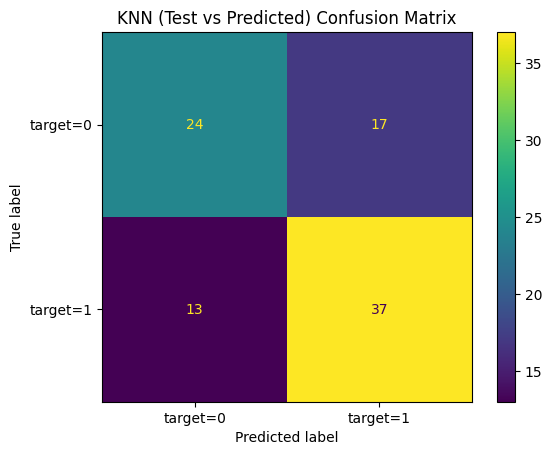

In [27]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix, display_labels=['target=0', 'target=1']).plot()
plt.title('KNN (Test vs Predicted) Confusion Matrix')

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)
x_train, x_test,y_train,y_test = train_test_split(X_pca, y, test_size=0.3, random_state=20) 

In [29]:
KNN.fit(X_pca, y)

KNeighborsClassifier(n_neighbors=13)

Text(0, 0.5, 'PCA2')

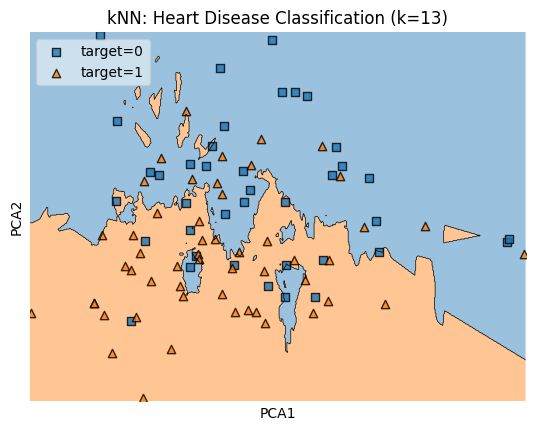

In [30]:
ax = plot_decision_regions(np.array(x_test), np.array(y_test), clf=KNN, legend=2)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['target=0', 'target=1'], framealpha=0.5, loc='upper left')
plt.title(f'kNN: Heart Disease Classification (k={K_num})')
plt.xticks([])
plt.yticks([])
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# 2-Random Forest Classifier

In [31]:
F_reg = RandomForestClassifier()
F_reg.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
cv_score = cross_val_score(model, x_train,y_train, cv=10 )
print(cv_score.mean())

0.6883116883116883


In [33]:
y_pred_Rand = F_reg.predict(x_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred_Rand)
print(accuracy)

0.6373626373626373


## Hyperparameter Tuning Using GridSearchCV

In [35]:
param = { 
    'n_estimators': [100, 150],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4, 6, 8],
    'criterion' :['gini', 'entropy']
}

CV = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param, cv= 3)
CV.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 150]})

In [36]:
CV.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [37]:
RF_new = RandomForestClassifier(criterion=  'entropy', max_depth= 4, max_features= 'log2', n_estimators= 100)
RF_new.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2')

In [38]:
pred = RF_new.predict(x_test)
acccuracy = accuracy_score(y_test,pred)
acccuracy

0.7032967032967034

In [39]:
acccuracy = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred, average="weighted")
precision = precision_score(y_test, pred, average="weighted")
f1_score = f1_score(y_test, pred, average="micro")

In [40]:
print("Accuracy: ", acccuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)

Accuracy:  0.7032967032967034
Precision:  0.7024400624202014
Recall:  0.7032967032967034
F1 Score:  0.7032967032967034


<Axes: >

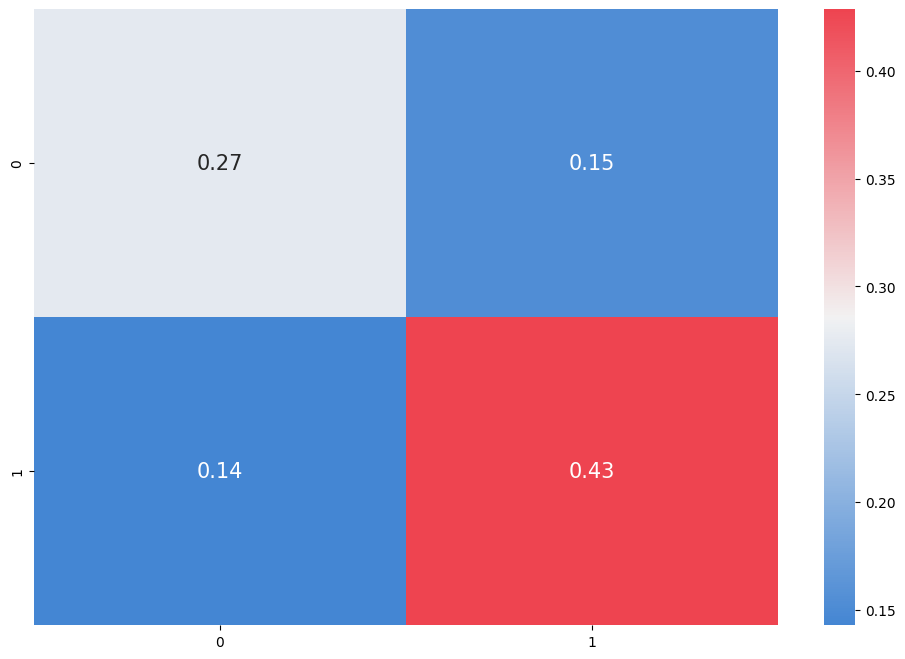

In [41]:
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

# 3- Logistic Regression

### Fitting the model and getting accuracy scores

In [42]:
LR = LogisticRegression(solver='liblinear', random_state=42)

In [43]:
LR.fit(x_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [45]:
y_pred_lr = LR.predict(x_test)

In [52]:
acccuracy_lr = accuracy_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr, average="weighted")
precision_lr = precision_score(y_test, y_pred_lr, average="weighted")
#f1_score_lr = f1_score(y_test, y_pred_lr, average="micro")

In [54]:
print("Accuracy: ", acccuracy_lr)
print("Precision: ", precision_lr)
print("Recall: ", recall_lr)
#print("F1 Score: ", f1_score)

Accuracy:  0.4835164835164835
Precision:  0.4846378111684234
Recall:  0.4835164835164835


# Key Findings
### The most accurate model out of the three is the Random Forest Classifier model with 70.3%